In [2]:
# CREDITS
#https://www.youtube.com/watch?v=7azmUg6XZA0 Open Source Student vaderSentiment and pandas video
#https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS Corey Schafer pandas playlist videos
#https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair

# CITE 
#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
import pandas as pd

In [3]:
#with open('results/khanacademy/_b-2rZpX5z4.json', 'r') as f:
    #df = json.load(f)

#COMPARE BETWEEN 2 VIDEOS TO START OFF THE SENTIMENT ANALYSIS MODEL  
df1 = pd.read_json('results/crashcourse/_O2sg-PGhEg.json')

df2 = pd.read_json('results/crashcourse/_tULRch1PRQ.json')

#AUTOMATE
#for video_id in video_ids_crashcourse.json:
#   df = pd.read_json(f'results/crashcourse/{video_id}.json')
#   if some json files with those video_ids do not exist, continue to the next (eg. 492 files in crashcourse folder instead of 1,439 videos on crashcourse youtube channel)

In [5]:
df1.head()

,comment_by,comment_text,comment_date,likes_count
0,sam JD,awesome host.. thank u so much,2022-07-14T09:38:00Z,1
1,Franzi Z,I love this series more with every episode I w...,2020-06-18T17:26:03Z,4
2,Wade Allen,When I see images or renderings of super clust...,2020-06-17T17:46:52Z,0
3,Susurrus,It&#39;s kinda like a video game where you try...,2020-06-10T12:41:45Z,1
4,Eugene Scott,Can someone shed some light on why a super mas...,2020-06-06T00:10:48Z,0


In [7]:
df2.head()

,comment_by,comment_text,comment_date,likes_count
0,Rich Invents,"Excellent video, very informative. ONE sugges...",2022-08-15T14:58:30Z,0
1,F Wily,"Talk faster, you are too slow. I only have a 3...",2020-05-16T14:55:28Z,4
2,Sedat Ayyıldız,I like your academic and scientific jokes :)),2020-05-06T10:26:24Z,1
3,Eva Lynn,This mans hilarious,2020-04-28T09:52:08Z,0
4,Timothy Little,The best way to rob a bank is to own one,2020-04-09T07:37:44Z,1


In [9]:
# CITE 
#Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

analyzer = SentimentIntensityAnalyzer()
positive1 = []
negative1 = []
neutral1 = []

positive2 = []
negative2 = []
neutral2 = []

In [10]:
#for line in df['Comment']:
for line in range(df1.shape[0]): 
#range() method returns total number or length or indexes of 2d array data's rows [0] or data's columns [1]
#use df.shape[0] to only loop through rows while shape[1] gives columns

    comments = df1.iloc[line, 1] #iloc returns the value of looped lines/rows of the first[1] column 'Comment' key index
    #print(comments)
    comments_analyzed = analyzer.polarity_scores(comments)
    #print(comments_analyzed)
    #print("{:-<65} {}".format(comments, str(comments_analyzed)))


#RUN ONCE
    negative1.append(comments_analyzed["neg"])
    #negative += comments_analyzed["neg"] is not suitable for this

    positive1.append(comments_analyzed["pos"])
    #print(positive)

    neutral1.append(comments_analyzed["neu"])
    #print(neutral)

In [11]:
#for line in df['Comment']:
for line in range(df2.shape[0]): 
#range() method returns total number or length or indexes of 2d array data's rows [0] or data's columns [1]
#use df.shape[0] to only loop through rows while shape[1] gives columns

    comments = df2.iloc[line, 1] #iloc returns the value of looped lines/rows of the first[1] column 'Comment' key index
    #print(comments)
    comments_analyzed = analyzer.polarity_scores(comments)
    #print(comments_analyzed)
    #print("{:-<65} {}".format(comments, str(comments_analyzed)))


#RUN ONCE
    negative2.append(comments_analyzed["neg"])
    #negative += comments_analyzed["neg"] is not suitable for this

    positive2.append(comments_analyzed["pos"])
    #print(positive)

    neutral2.append(comments_analyzed["neu"])
    #print(neutral)

cross checking

In [17]:
df1.shape

(1375, 4)

In [18]:
len(negative1)

1375

In [13]:
df2.shape

(222, 4)

In [16]:
len(negative2)

222

In [20]:
#compare visualization graph of averages of 1 video to commentaire's graph of same video
#total of neg / total rows = avg of neg
#neutral + positive = positive

#word cloud 
#combine words from all positive comments from all videos of channel list

In [21]:
df1.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count'], dtype='object')

In [22]:
df2.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count'], dtype='object')

In [34]:
#add new columns to df1


#add new columns and their values to dataframe version of json
df1["negative"] = negative1 #create and add new column named Negative
df1["neutral"] = neutral1
df1["positive"] = positive1

#pd.set_option('display.max_columns', None)
#print(df.head())


#print(df1.nlargest(5, ['Negative']))
#print(df1.nlargest(5, ['Neutral']))
#print(df1.nlargest(5, ['Positive']))


#average sentiment scores of 1st video comments
neg_avg1 = df1['negative'].mean()
print(neg_avg1)

neu_avg1 = df1['neutral'].mean()
print(neu_avg1)

pos_avg1 = df1['positive'].mean()
print(pos_avg1)


0.038584
0.8247447272727272
0.13666109090909093


In [35]:
#add new columns to df2


#add new columns and their values to dataframe version of json
df2["negative"] = negative2 #create and add new column named Negative
df2["neutral"] = neutral2
df2["positive"] = positive2

#pd.set_option('display.max_columns', None)
#print(df.head())


#print(df1.nlargest(5, ['Negative']))
#print(df1.nlargest(5, ['Neutral']))
#print(df1.nlargest(5, ['Positive']))


#average sentiment scores of 1st video comments
neg_avg2 = df2['negative'].mean()
print(neg_avg2)

neu_avg2 = df2['neutral'].mean()
print(neu_avg2)

pos_avg2 = df2['positive'].mean()
print(pos_avg2)

0.08393693693693693
0.7655900900900902
0.1504864864864865


In [36]:
df2.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count', 'Negative',
       'Neutral', 'Positive', 'negative', 'neutral', 'positive'],
      dtype='object')

In [37]:
df1.columns

Index(['comment_by', 'comment_text', 'comment_date', 'likes_count', 'Negative',
       'Neutral', 'Positive', 'negative', 'neutral', 'positive'],
      dtype='object')

In [38]:
print(len(df1['comment_text']))

1375


In [40]:
print(len(df1['negative']))

1375


In [41]:
print(df1.nlargest(5, ['positive']))

                comment_by   comment_text          comment_date  likes_count  \
46               gaming EX            Lol  2020-03-26T18:13:20Z            0   
518              MiguelPpM      Brilliant  2016-05-04T21:46:14Z            0   
666          Blast Zephera        awesome  2015-11-15T17:07:11Z            0   
705  Pierre-Xavier FILLEUL           Nice  2015-11-11T09:38:09Z            0   
779               h Grewal  amazing!!!!!!  2015-11-08T06:45:13Z            0   

     Negative  Neutral  Positive  negative  neutral  positive  
46        0.0      0.0       1.0       0.0      0.0       1.0  
518       0.0      0.0       1.0       0.0      0.0       1.0  
666       0.0      0.0       1.0       0.0      0.0       1.0  
705       0.0      0.0       1.0       0.0      0.0       1.0  
779       0.0      0.0       1.0       0.0      0.0       1.0  


In [45]:
#https://www.geeksforgeeks.org/data-visualization-different-charts-python/
#A pie chart represents numbers in percentages, and the total sum of all segments needs to equal 100%
#bar chart of 2 bars
#x axis = video's neg and pos averages
#y axis = average score values


posavgpercentage1 = pos_avg1*100
negavgpercentage1 = neg_avg1*100
neuavgpercentage1 = neu_avg1*100

print('df1 \n positive % = {} \n negative % = {} \n neutral % = {}'.format(posavgpercentage1, negavgpercentage1, neuavgpercentage1))

df1 
 positive % = 13.666109090909092 
 negative % = 3.8584 
 neutral % = 82.47447272727271


In [46]:
print('df1 \n positive % = {} \n negative % = {}'.format(posavgpercentage1 + neuavgpercentage1, negavgpercentage1))

df1 
 positive % = 96.1405818181818 
 negative % = 3.8584


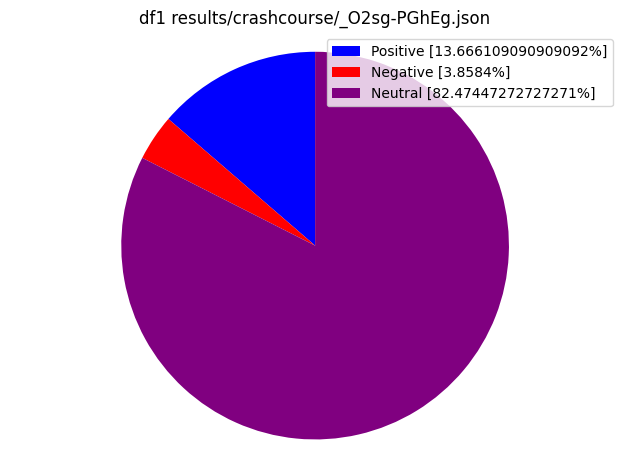

In [47]:
import matplotlib.pyplot as plt

labels = ['Positive ['+str(posavgpercentage1)+'%]', 'Negative ['+str(negavgpercentage1)+'%]', 'Neutral ['+str(neuavgpercentage1)+'%]']
sizes = [posavgpercentage1, negavgpercentage1, neuavgpercentage1]
colors = ['blue','red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df1 results/crashcourse/_O2sg-PGhEg.json") 

#def dump() function to extract video_title and use video_title to name csv file of comments of your own code

plt.axis('equal')
plt.tight_layout()
plt.show()

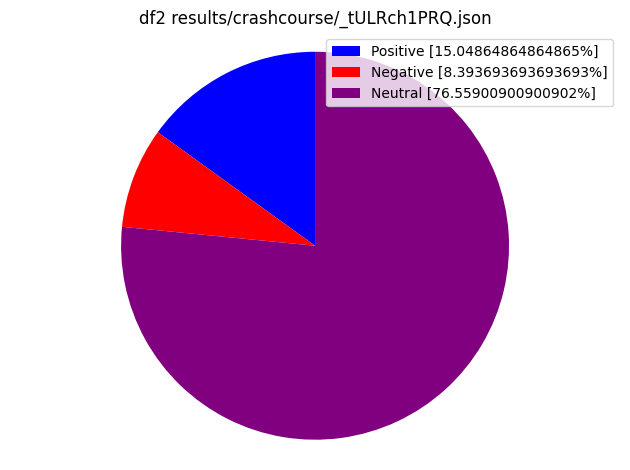

In [48]:
posavgpercentage2 = pos_avg2*100
negavgpercentage2 = neg_avg2*100
neuavgpercentage2 = neu_avg2*100

labels = ['Positive ['+str(posavgpercentage2)+'%]', 'Negative ['+str(negavgpercentage2)+'%]', 'Neutral ['+str(neuavgpercentage2)+'%]']
sizes = [posavgpercentage2, negavgpercentage2, neuavgpercentage2]
colors = ['blue','red', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df2 results/crashcourse/_tULRch1PRQ.json") 

#def dump() function to extract video_title and use video_title to name csv file of comments of your own code

plt.axis('equal')
plt.tight_layout()
plt.show()

In [50]:
#https://pypi.org/project/emoji/
#https://unicode.org/emoji/charts/full-emoji-list.html

import emoji
print(emoji.emojize(':grinning_face:')) 
print(emoji.emojize(':thumbs_up:'))

😀
👍


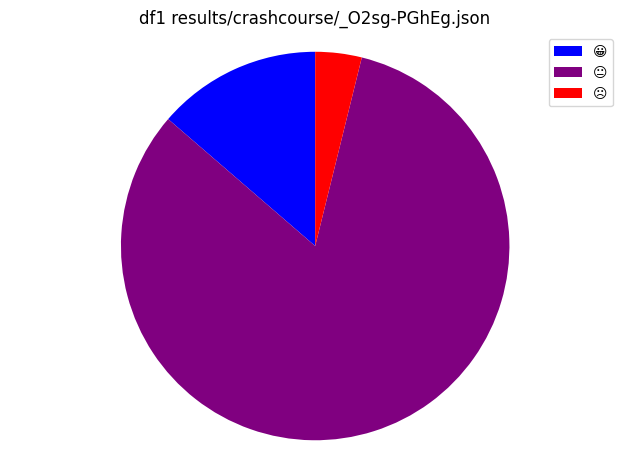

In [58]:
labels = [emoji.emojize(':grinning_face:'), emoji.emojize(':neutral_face:'), emoji.emojize(':frowning_face:')]
sizes = [posavgpercentage1, neuavgpercentage1, negavgpercentage1]
colors = ['blue', 'purple', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df1 results/crashcourse/_O2sg-PGhEg.json") 

plt.axis('equal')
plt.tight_layout()
plt.show()

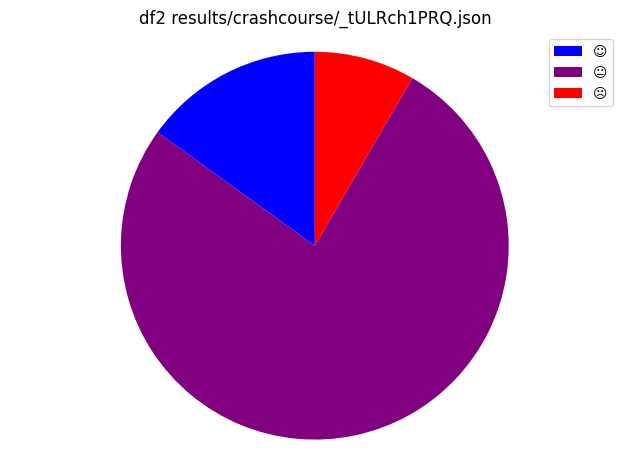

In [60]:
labels = [emoji.emojize(':smiling_face:'), emoji.emojize(':neutral_face:'), emoji.emojize(':frowning_face:')]
sizes = [posavgpercentage2, neuavgpercentage2, negavgpercentage2]
colors = ['blue', 'purple', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")

plt.title("df2 results/crashcourse/_tULRch1PRQ.json") 

plt.axis('equal')
plt.tight_layout()
plt.show()